In [ ]:
#pip install jieba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import requests
# 設定字體為中文字體
#plt.rcParams['font.family'] = ['Microsoft JhengHei']

# 讀取文本資料
#with open('input.txt', 'r', encoding='utf-8') as f:
# text = f.read()
response = requests.get('https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt')
text = response.text
text = re.sub('[^\w\s]', '', text)

# 使用jieba進行分詞
words = list(jieba.cut(text))
word_count = Counter(words)
top100_freq = word_count.most_common(100)#取前100

In [ ]:
#計算TF-IDF權重
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([text])
tfidf_scores = zip(tfidf.get_feature_names_out(), tfidf_matrix.toarray()[0])
tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# 取前100個
top100_tfidf = tfidf_scores[:100]
print(top100_tfidf)

[('的八卦', 0.3433089395621334), ('有沒有', 0.3387618012897872), ('vs', 0.3105045848830648), ('沒有資料', 0.2111171340732135), ('o_o', 0.1727912543491532), ('qq', 0.17019288962209828), ('認真回', 0.15492749685065052), ('都幾', 0.15200433653271372), ('2017', 0.14518362912419452), ('2016', 0.13446537462509292), ('嘻嘻', 0.12537109808040064), ('xd', 0.12407191571687318), ('很好', 0.12277273335334571), ('真的', 0.11757600389923584), ('怎麼辦', 0.11010570530895289), ('不會', 0.10685774940013422), ('幫qq', 0.10523377144572489), ('女生屁股有線的概念嘛', 0.09419072135574141), ('づωづ', 0.08542124040193101), ('哈哈', 0.0795749197660574), ('呵呵', 0.07925012417517553), ('ㄟvo', 0.07437819031194753), ('謝謝', 0.07340380353930193), ('沒有', 0.06885666526695579), ('說個笑話', 0.0678822784943102), ('問卦', 0.06755748290342832), ('很不方便', 0.06593350494901899), ('說真的', 0.058138410767854184), ('笑死', 0.055864841631681116), ('好啦', 0.05456565926815365), ('給你參考', 0.05294168131374431), ('ㄏㄏ', 0.051642498950216845), ('你說呢', 0.051642498950216845), ('肥宅', 0.050668

In [ ]:
#!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-03-18 15:46:41--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.99.101, 142.250.99.138, 142.250.99.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.99.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h4v1407sp4idrfam3igavt3jjhlnrhk9/1679154375000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b978fa28-3b37-4694-a2d4-88b1f6d4b23c [following]
--2023-03-18 15:46:44--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h4v1407sp4idrfam3igavt3jjhlnrhk9/1679154375000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=b978fa28-3b37-4694-a2d4-88b1f6d4b23c
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.253.117.132, 2607:f8b0:400e:c0a::84
Connecting to doc-0

In [ ]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager
#中文字體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

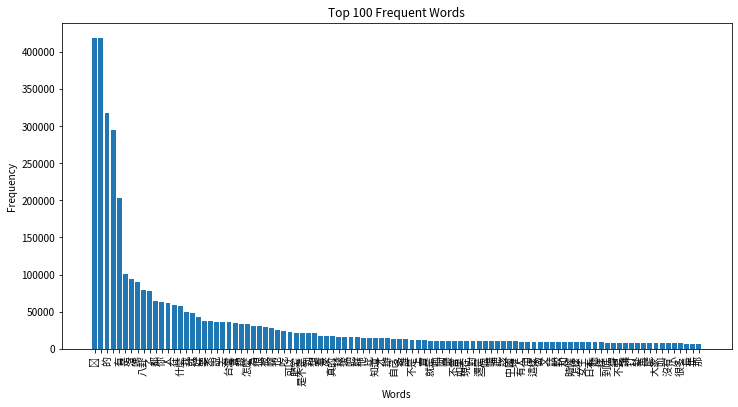

In [ ]:
# 繪製高頻詞統計圖
x1 = range(len(top100_freq))
y1 = [f[1] for f in top100_freq]
plt.figure(figsize=(12,6))
plt.bar(x1, y1)
plt.xticks(x1, [f[0] for f in top100_freq], rotation=90)
plt.title('Top 100 Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
#plt.tight_layout()
plt.show()

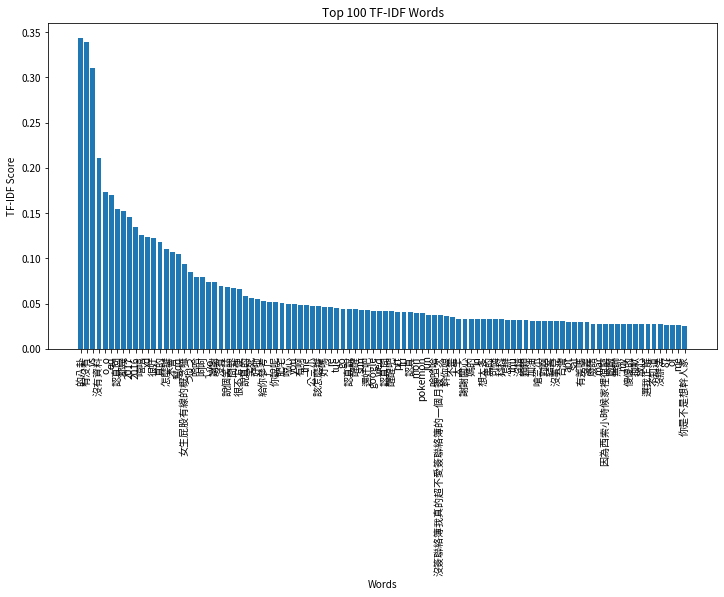

In [ ]:
# 繪製TF-IDF權重詞統計圖
x2 = range(len(top100_tfidf))
y2 = [f[1] for f in top100_tfidf]
plt.figure(figsize=(12,6))
plt.bar(x2, y2)
plt.xticks(x2, [f[0] for f in top100_tfidf], rotation=90)
plt.title('Top 100 TF-IDF Words')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
#plt.tight_layout()
plt.show()

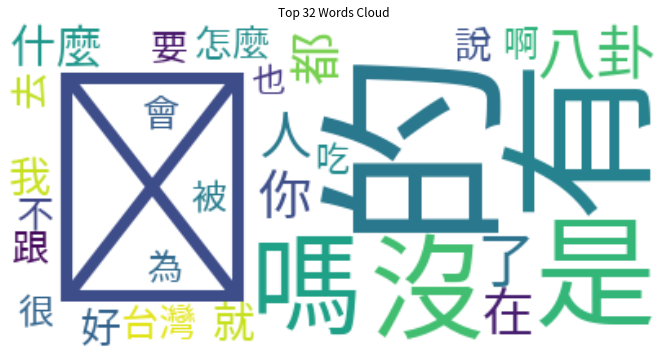

In [ ]:
# 製作前32個文字雲
wc = WordCloud(background_color="white", contour_width=3, contour_color='steelblue', font_path= 'TaipeiSansTCBeta-Regular.ttf')
wc.generate_from_frequencies(dict(word_count.most_common(32)))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Top 32 Words Cloud')
#plt.tight_layout()
plt.show()
